In [1]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import random as rn
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gc
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras import  layers, models



from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Conv2D, MaxPool2D, Activation
from sklearn.utils import shuffle
from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.utils import plot_model

In [2]:
from glob import glob

# Search for both JPEG and PNG files
imagePatches = glob(r"C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Dataset/**/*.jpeg", recursive=True) + glob(r"C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Dataset/**/*.png", recursive=True)

print(len(imagePatches))


11236


In [3]:
x = [] # Store the image data
y = [] # Store the corresponding labels

for img_path in imagePatches:
    folder_name = os.path.basename(os.path.dirname(img_path))  # Extract parent folder name
    full_size_image = cv2.imread(img_path) # Reading each image inside imagePatches
    if full_size_image is None:
        continue  # Skip if image cannot be read
    im = cv2.resize(full_size_image, (224, 224), interpolation=cv2.INTER_CUBIC) # Resizing the image
    im = im.astype(np.float32)/255. # Converts the image data to a floating-point format and normalizes the pixel values to be in the range [0, 1]
    x.append(im)
    if folder_name.upper() == 'NORMAL':
        y.append(0)
    elif folder_name.upper() == 'PNEUMONIA':
        y.append(1)
    else:
        print('Unknown class:', folder_name)

x = np.array(x)
y = np.array(y)



In [4]:
np.save(r'C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Model\x_data.npy', x)
np.save(r'C:\Users\Admin\Documents\SEM4\Project\Pneumonia_Model\y_data.npy', y)

Shape of x: (11236, 224, 224, 3)
Shape of y: (11236,)


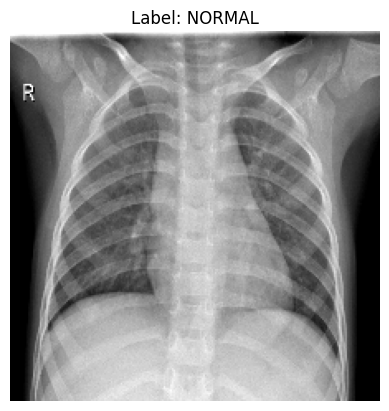

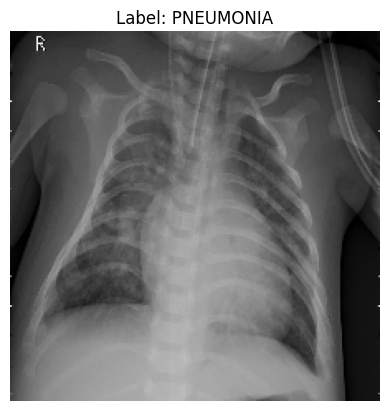

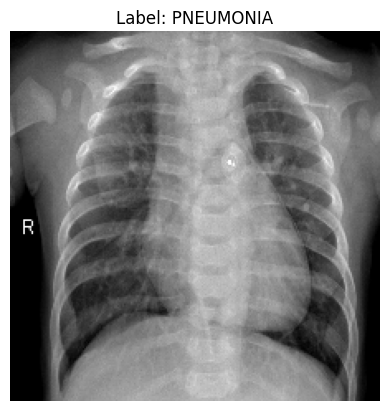

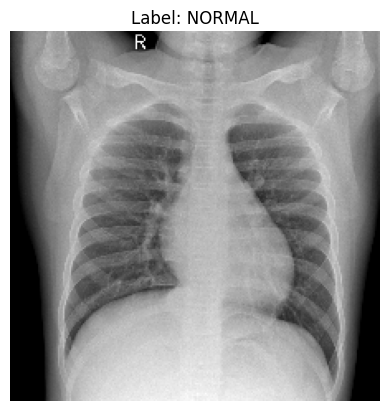

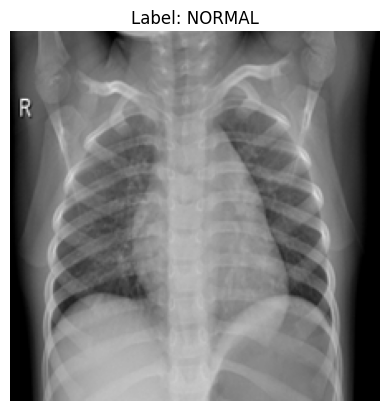

In [5]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

# Randomly select some samples
num_samples_to_check = 5
random_indices = np.random.choice(len(x), num_samples_to_check, replace=False)

# Display the images and their labels
for i in random_indices:
    image = x[i]
    label = y[i]
    
    # Convert label to string
    label_str = "PNEUMONIA" if label == 1 else "NORMAL"
    
    # Display image and label
    plt.imshow(image)
    plt.title("Label: " + label_str)
    plt.axis('off')
    plt.show()